In [14]:
import proposal as pp
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# this is the code I've sent you via Slack some time ago, you are probably using something
# similar within your scripts

builder = pp.particle.ParticleDefBuilder()
builder.SetParticleDef(pp.particle.MonopoleDef()) # use default settings of monopole
builder.SetMass(150000) # overwrite mass of monopole (unit: MeV)
builder.SetCharge(100) # overwrite charge of monopole (unit: multiples of elementary charge)
builder.SetParticleType(42) # assign unique monopole type. note that you have to use this later when initializing the monopole!
builder.build()

In [31]:
particle_def = pp.particle.get_ParticleDef_for_type(42) # use particle_def for monopole

# note: "medium" and "mass_density" must be adjusted for the sector that you want to look at
medium = pp.medium.Ice()
mass_density = 0.762944

In [27]:
energy_cuts = pp.EnergyCutSettings(1e8, 1)

# these are the cross sections that are used in NuRadioMC/EvtGen/config_PROPOSAL_greenland.json
param_brems = pp.parametrization.bremsstrahlung.KelnerKokoulinPetrukhin(True, particle_def, medium, mass_density/medium.mass_density)
param_epair = pp.parametrization.pairproduction.KelnerKokoulinPetrukhin(True, particle_def, medium, mass_density/medium.mass_density)
param_ioniz = pp.parametrization.ionization.BetheBlochRossi(energy_cuts)
param_photo = pp.parametrization.photonuclear.AbramowiczLevinLevyMaor97(pp.parametrization.photonuclear.ShadowButkevichMikheyev())

cross_vec = []
for param in [param_brems, param_epair, param_ioniz, param_photo]:
    cross_vec.append(pp.crosssection.make_crosssection(param, particle_def, medium, energy_cuts, False))

Text(0, 0.5, 'dNdx')

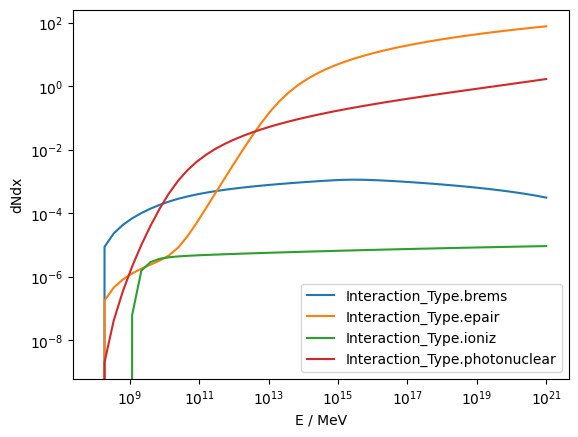

In [28]:
# calculate stochastic cross section for each medium:

energies = np.geomspace(1e8, 1e21) # PROPOSAL energies in MeV

for cross in cross_vec:
    plt.loglog(energies, cross.calculate_dNdx(energies), label=cross.type)
plt.legend()
plt.xlabel('E / MeV')
plt.ylabel('dNdx')

Text(0, 0.5, 'dEdx')

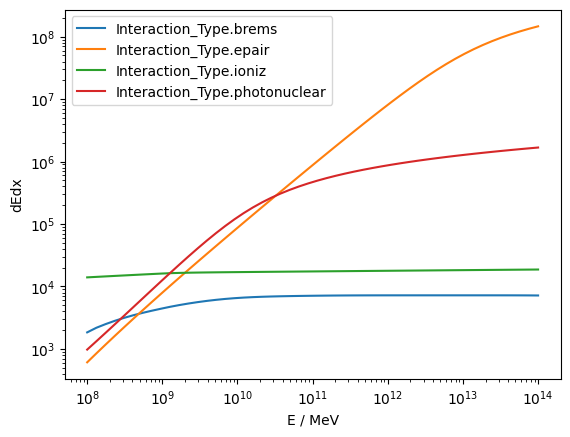

In [29]:
# calculate continuous energy loss for each type:

energies = np.geomspace(1e8, 1e14) # PROPOSAL energies in MeV

for cross in cross_vec:
    plt.loglog(energies, cross.calculate_dEdx(energies), label=cross.type)
plt.legend()
plt.xlabel('E / MeV')
plt.ylabel('dEdx')